In [9]:
import networkx as nx
import matplotlib.pyplot as plt 
import time
import gc
import pandas as pd
import numpy as np
from ranking import *


In [10]:

def measure_pagerank_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3):
    """
    Измеряет время выполнения создания объекта PageRank и время вычисления 
    PageRank для заданных данных, уменьшая влияние сборщика мусора.

    Args:
        data: DataFrame с данными рекомендаций.
        user_id_column: Название столбца с ID пользователей.
        movie_id_column: Название столбца с ID фильмов.
        rating_column: Название столбца с рейтингом.
        pers: Параметр pers для PagerankFactory.
        count_measure: Количество измерений (для усреднения).

    Returns:
        Tuple: Время создания объекта PageRank (в секундах), 
               время выполнения get_pagerank (в секундах).
    """
    gc.collect()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    pg = PagerankFactory().read_pd(data, user_id_column, movie_id_column, rating_column, pers)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = pg.get_pagerank()
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

In [11]:
def measure_hits_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3):
    gc.collect()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    pg = HITSFactory().read_pd(data, user_id_column, movie_id_column, rating_column, pers)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = pg.get_rank()
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

In [12]:
def plot_time(filename):
    """
    Строит график зависимости времени выполнения  от размера выборки.

    Args:
        filename: Имя файла CSV с данными о времени выполнения.
    """
    df = pd.read_csv(filename)

    # Строим график
    plt.plot(df['Размер выборки'], df['Время выполнения'], marker='o')

    # Настраиваем оси и заголовок графика
    plt.xlabel('Размер выборки')
    plt.ylabel('Время выполнения (секунды)')
    plt.title('Зависимость времени выполнения  от размера выборки')

    # Отображаем график
    plt.show()

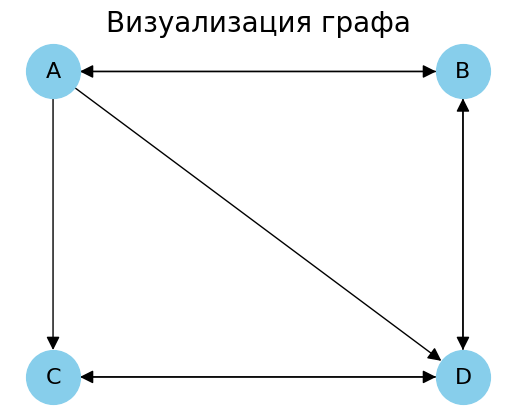

In [13]:

# Задаем позиции узлов
pos = {'A': (0, 2), 'B': (2, 2), 'C': (0, 0), 'D': (2, 0)}
# Создаем граф (используем граф из предыдущих примеров)
graph = nx.DiGraph()  # DiGraph - для ориентированного графа
graph.add_edges_from([('A', 'B'), ('B', 'A'),
                      ('B', 'D'), ('D', 'B'),
                      ('D', 'C'), ('C', 'D'),
                      ('A', 'C'),
                      ('A', 'D')])


plt.title("Визуализация графа", fontsize=20) 
# Визуализируем граф
nx.draw(graph, pos=pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=16, arrowsize=20)
plt.show()

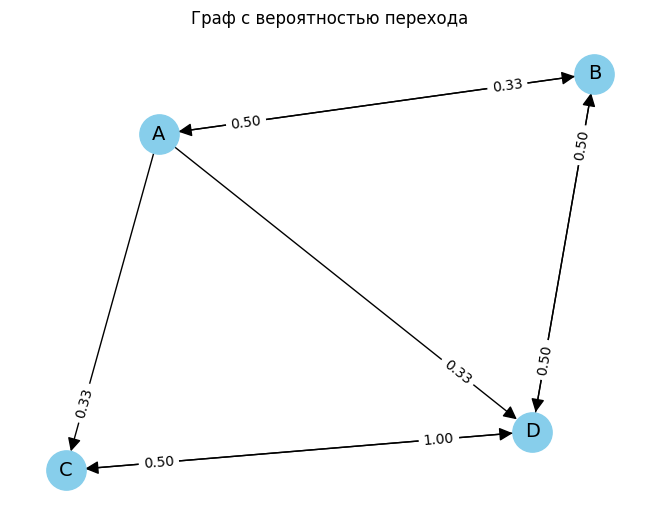

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_transition_matrix(matrix):
    """
    Визуализирует матрицу переходов в виде графа,
    где веса ребер - значения из матрицы,
    с учетом разных весов для (A, B) и (B, A).

    Args:
        matrix: Матрица переходов (список списков).
    """

    num_nodes = len(matrix)
    graph = nx.DiGraph()

    ABCDE = "ABCDE"
    for i in range(num_nodes):
        for j in range(num_nodes):
            weight = matrix[i][j]
            if weight > 0:
                # Добавляем ребро с весом 
                graph.add_edge(ABCDE[i], ABCDE[j], weight=weight)

    # Создаем словарь с подписями для ребер,
    # используем оба направления для ключа
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}

    # Размещаем узлы, избегая наложения
    pos = nx.spring_layout(graph, k=0.3*1/num_nodes)

    # Рисуем граф
    nx.draw(graph, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=14, arrowsize=20)

    # Добавляем подписи на ребра с учетом смещения
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, label_pos=0.2)

    plt.title("Граф с вероятностью перехода")
    plt.show()

# Пример матрицы переходов (из предыдущих примеров)
matrix = [
    [0, 0.33, 0.33, 0.33],
    [0.5,   0,   0,  0.5],
    [0,   0,   0,  1],
    [0,   0.5,   0.5,  0]
]

# Визуализируем граф
visualize_transition_matrix(matrix)

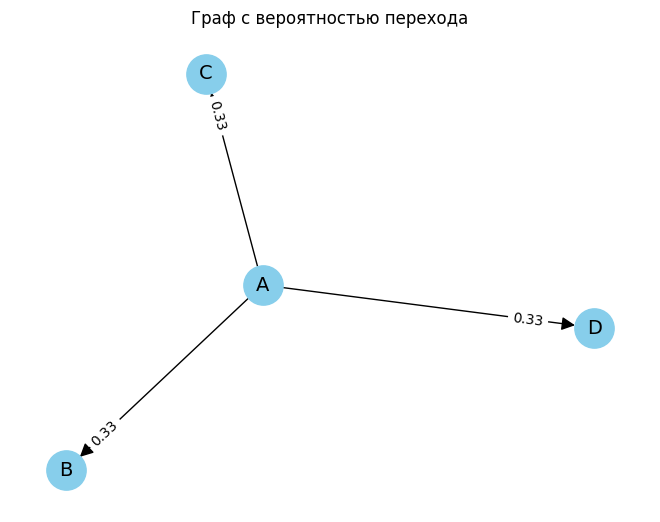

In [15]:
# Пример матрицы переходов (из предыдущих примеров)
matrix = [
    [0, 0.33, 0.33, 0.33],
    [0,   0,   0,  0],
    [0,   0,   0,  0],
    [0,   0,   0,  0]
]

# Визуализируем граф
visualize_transition_matrix(matrix)

In [16]:


df = pd.read_csv("res\\movie\\rating.csv")

# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data = df.sample(frac=i)
    creation_time, execution_time = measure_pagerank_time(data, 'userId', 'movieId', 'rating')
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('pagerank_time_results.csv', index=False)

100%|██████████| 100/100 [00:10<00:00,  9.25it/s]


Время создания: 2.0206 секунд
Время выполнения: 10.9481 секунд
Размер 0.1


100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


Время создания: 3.9978 секунд
Время выполнения: 21.6094 секунд
Размер 0.2


100%|██████████| 100/100 [00:31<00:00,  3.16it/s]


Время создания: 6.0999 секунд
Время выполнения: 32.0264 секунд
Размер 0.30000000000000004


100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


Время создания: 7.9337 секунд
Время выполнения: 42.4310 секунд
Размер 0.4


100%|██████████| 100/100 [00:53<00:00,  1.88it/s]


Время создания: 10.3529 секунд
Время выполнения: 52.8810 секунд
Размер 0.5


100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


Время создания: 12.0903 секунд
Время выполнения: 62.8918 секунд
Размер 0.6


100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


Время создания: 13.7638 секунд
Время выполнения: 73.3524 секунд
Размер 0.7000000000000001


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Время создания: 15.9054 секунд
Время выполнения: 83.8641 секунд
Размер 0.8


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


Время создания: 18.4365 секунд
Время выполнения: 93.5440 секунд
Размер 0.9


100%|██████████| 100/100 [01:50<00:00,  1.11s/it]


Время создания: 19.7900 секунд
Время выполнения: 107.6469 секунд
Размер 1.0


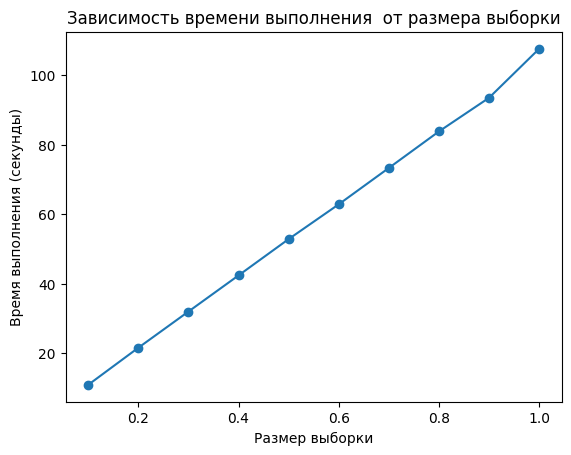

In [17]:
plot_time('pagerank_time_results.csv')

In [18]:
df = pd.read_csv("res\\movie\\rating.csv")

# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data = df.sample(frac=i)
    creation_time, execution_time = measure_hits_time(data, 'userId', 'movieId', 'rating')
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('hits_time_results.csv', index=False)

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


Время создания: 2.2559 секунд
Время выполнения: 22.0636 секунд
Размер 0.1


100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


Время создания: 4.0153 секунд
Время выполнения: 39.8127 секунд
Размер 0.2


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Время создания: 6.4134 секунд
Время выполнения: 58.4164 секунд
Размер 0.30000000000000004


100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Время создания: 8.3943 секунд
Время выполнения: 79.9191 секунд
Размер 0.4


100%|██████████| 100/100 [01:45<00:00,  1.05s/it]


Время создания: 10.1960 секунд
Время выполнения: 98.3525 секунд
Размер 0.5


100%|██████████| 100/100 [02:02<00:00,  1.22s/it]


Время создания: 12.8039 секунд
Время выполнения: 114.3185 секунд
Размер 0.6


100%|██████████| 100/100 [02:17<00:00,  1.37s/it]


Время создания: 15.4215 секунд
Время выполнения: 134.4049 секунд
Размер 0.7000000000000001


100%|██████████| 100/100 [02:22<00:00,  1.43s/it]


Время создания: 17.0050 секунд
Время выполнения: 144.7347 секунд
Размер 0.8


100%|██████████| 100/100 [02:57<00:00,  1.78s/it]


Время создания: 19.6068 секунд
Время выполнения: 168.2152 секунд
Размер 0.9


100%|██████████| 100/100 [02:58<00:00,  1.78s/it]


Время создания: 21.4132 секунд
Время выполнения: 178.2753 секунд
Размер 1.0


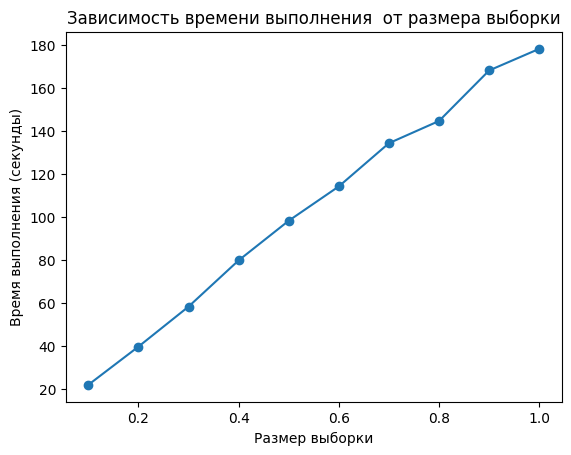

In [20]:
plot_time('hits_time_results.csv')